<a href="https://colab.research.google.com/github/JhonathanOrtiz/NLP/blob/master/wordEmbeddings_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.utils import tokenize
import re
import tensorflow as tf
import numpy as np
from spacy.lang.es import Spanish
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
document = input()

Para crear un programa, y que la computadora lo interprete y ejecute las instrucciones escritas en él, debe escribirse en un lenguaje de programación. En sus comienzos las computadoras interpretaban solo instrucciones en un lenguaje específico, del más bajo nivel, conocido como código máquina, siendo este excesivamente complicado para programar. De hecho solo consiste en cadenas de números 1 y 0 sistema binario. Para facilitar el trabajo de programación, los primeros científicos, que trabajaban en el área, decidieron reemplazar las instrucciones, secuencias de unos y ceros, por palabras o abreviaturas provenientes del inglés




> # <strong>PREPROCESSING</strong>

<h2>Leer datos</h2>
<body>El primer paso que debemos realizar para trabajar con texto y modelos e machine learning es preprocesar nuestros datos ya que dichos modelos no trabajan con texto, a ellos le encantan los números, el primer paso es tomar ese dataset de nuestro gusto y leerlos, usualmente encontramos entos archivos en formato .json o .txt, sin embargo esta vez usaremos la función input de python y así leeremos nuestros datos.
</body>

<h2>Minúsculas y espacios en blanco</h2>
<body>
Las mayúsculas y las sangrías tienen mucho significado gramatical y para nosotros los humanos es muy importante, sin embargo, para un modelo de Machine Learning en este caso, ésto es sólo ruido y no aportarian nada por lo el contrario ser causarnos problemas por esa razón ponemos todo en minusculas y suprimimos las sangrìas.
</body>

<h2>Tokenizar</h2>
<body>
Pensemos un poco si nuestros modelos son fanáticos de los números ¿Como podemos transformar esas cadenas de caracteres a numeros? 
*IDEA*: ¿Y si tratamos codificar las palabras como numeros? SI entonces para empezar a con ello debemos tokenizar y es simplmente tomar todo nuestro texto y hacer una lista con todas y cada una de las palabras, es decir, cada elemento de la lista será una compomente de nuestra lista, jugando con las maneras de tokenizar y los metodos de python podemos tokenizar por palabras o por oraciones, veremos que esto de es particularmente útil en breve.
</body>


> # <strong>Read data</strong>


The first step we must do to work with text and models and machine learning is to pre-process our data as these models do not work with text, they love numbers, the first step is to take that dataset of our choice and read them, usually we find in these files in .json or .txt format, however this time we will use the python input function and read our data.

<h2>Lowercase and white spaces</h2>

Capital letters and indentations have a lot of grammatical meaning and for us humans it is very important, however, for a Machine Learning model in this case, this is just noise and would not contribute anything on the contrary be cause us problems for that reason we put everything in small letters and suppress the indentations.

<h2>Tokenization</h2>

Let's think a little if our models are fanatics of numbers. How can we transform those character chains into numbers? *IDEA*: What if we try to code the words as numbers? If to begin with we must tokenize and it is simply to take all our text and make a list with each and every word, that is to say, each element of the list will be a component of our list, playing with the ways of tokenizing and the methods of python we can tokenize by words or by sentences, we will see that this of is particularly useful soon.





In [ ]:
#Without spaces and all letters lower
c = document.strip().lower()
doc = c.split()

nlp = Spanish()
text = nlp(c)

#Tokenize by words
token_list = [w.text for w in text]

words_set = set(token_list)
vocab_size = len(words_set)

#Tokenize by senceteces
senteces = re.compile('[.,]').split(c)



> # <strong>Diccionario</strong>

¡Necesitaremos crear nuestro propio diccionario! Ya que nuestro dataset contiene n palabras distintas nuestra lista será de longitud n. Para navegar en ella crearemos un diccionario que dado una pabalabra nos regrese en indice y dado un indice nos regrese una palabra.



> # <strong>Dictionary</strong>

We will need a own dictionary, and thus to get a word given a number and get a number given a word. This will has more sense later.

In [ ]:
word2idx = {}
idx2word = {}

for index, word in enumerate(words_set):
  word2idx[word]  = index
  idx2word[index] = word



> # <strong>One-Hot Encoding</strong>

La primera idea para trabajar con texto fue decir transformemos cada palabra del diccionario en un numero, y hacemos one-hot encoding, es decir, si tenemos n palabras en el diccionario creamos un vector de tamaño n y si tomamos la n-ésima palabra entonces la n-ésima compomentes del vector será 1 y el resto cero. *Anlogía* Eso es como tomar un libro completo para cada palabra. *risas*

Éste razonamiento es muy ùtil cuando en muchos casos, el problema de trabajar con texto y one hot-encoding es que estamos diciendo que todas las palabras del diccionario son equi-distantes, es decir, estamos afirmando qué la palabras como Manzana, Pera y Herramienta tienen la misma relación y eso no es cierto. 

Para corregir éste problema nació [word2vec](https://arxiv.org/abs/1301.3781) éste modelo de deep learning trata de predecir dada una cuales son los vecinos (Skip-Gram) ya veremos como funciona esto.

![](https://chrisalbon.com/images/machine_learning_flashcards/One-Hot_Encoding_print.png)

In [ ]:
def to_categorical(word_idx, vocab_size):
  one_hoted = np.zeros(vocab_size)
  one_hoted[word_idx] = 1
  return np.array(one_hoted)




> # <strong>Skip-gram</strong>

Si queremos entrenar un modelo de machine learning de manera supervisada necesitamos etiquetas para enseñarle al modelo a que categoria pertenece cada entrada y sòlo tenemos un corpus de texto? Entonces contruimos un algoritmo para generar esas etiquetas. Dado el problema queremos predecir las palabras vecinaas dada alguna palabra. Con skip-gram nos paramos en cada una de las palabras de la oración y tomamos las dos de la derecha y las dos de la izquierda, esas cuatro serán las etiquetas para la palabra.

Ahora pensemos porque esto tiene sentido.

Primero, nuestro problema es que con one-hot decimos que todas las palabras tienen la misma relación por ejemplo que perro y carro tiene la misma relación que perro y lobo, la verdad es que no es cierto por tal motivo queremos una representación mas real.

Si ponemos a una red neuronal que dada una palabra pueda predecir las palabras vecinas entonces la red se verá en la neceidad de aprender a codificar en la capa oculta esas relaciones que estamos buscando, después solo la tomamos y problema resulto.



> # <strong> Skip-Gram </strong>

When we train a Supervise Deep Learning we need Data and Label, but in this case we only have corpus data. Then we build and algorithm and generate label.. if our sentence is a list of word so, we take a simple word and take 2 neighbor from the rigth side and 2 neighbor from the left side and these are the label for this simple word.

Now let's think about, why does it make sense.

Our problem is that with one-hot representation all words has the same distance on a plane, I mean with one-hot representation we say that, each word has the same relationship, for example, Queen, Princess, and Car have the same relationship and this is not correct because, Queen and princess have more relationship than Queen and Car.. 

With skip-gram we take a word and the neighbors are the label, neighbor word could have a relationship, So a neural netword learn to predict a neighbor word given a word to solve this task the neural network learn to encode this one-hot vector to classify it. Then if we take the hidden layer we have a representation where word that have a strong relationship are closer than another word that not.


![](https://cdn-images-1.medium.com/max/1600/0*Q7o7qvuJf7W6JNeY.png)

In [ ]:
def skip_gram(senteces, wz):

  data =[]

  for sentece in senteces:
    sentece = sentece.split()
    for i, word in enumerate(sentece):
      for nb_word in sentece[max(i-wz, 0): min(i+wz, len(sentece))+1]:
        if word != nb_word:
           data.append([word, nb_word])
  return data



> # <Strong>Modelo</strong>

El modelo es tan sencillo como un una simple red neuronal multicapa con una capa oculta la cual crearemos sin los API, por el contrario crearemos las matrices desde cero, para que luego sea mas sencillo tomarlas.






>  # <Strong>Model</strong>


The model is as simple as a simple multi-layer neural network with a hidden layer which we will create without the APIs, on the contrary we will create the arrays from scratch, so that later it will be easier to take them.

![](https://www.researchgate.net/publication/334209824/figure/fig3/AS:776808106577938@1562216893819/Word2vec-skip-gram-and-analogies-a-Target-words-LiCoO2-and-LiMn2O4-are-represented.png)

In [ ]:
class word2vec:
  def __init__(self, vocab_size=0, embedding_size=16, optimizer='sgd', epochs=1000):
    self.vocab_size = vocab_size
    self.embedding_size = embedding_size
    self.epochs= epochs
    if optimizer == 'adam':
      self.optimizer = tf.optimizers.Adam()
    else:
      self.optimizer = tf.optimizers.SGD()
  
  def vectorized(self, word_idx):
    return (self.w1+self.b1)[word_idx]
  
  def train(self, x_train=None, y_train=None):
    if x_train is not None and y_train is not None:
    
      #first hidden layer
      self.w1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_size], dtype=tf.float32)) #weights matrix
      print(self.w1.shape)
      self.b1 = tf.Variable(tf.random.normal([self.embedding_size])) #Bias vector

      #output layers
      self.w2 = tf.Variable(tf.random.normal([self.embedding_size, self.vocab_size], dtype=tf.float32))
      self.b2 = tf.Variable(tf.random.normal([self.vocab_size], dtype=tf.float32))
      
      
      for epoch in range(self.epochs):
        with tf.GradientTape() as t:
          loss = []
          #Start train
          f_out = tf.add(tf.matmul(x_train, self.w1), self.b1)
          output = tf.nn.softmax(tf.add(tf.matmul(f_out, self.w2), self.b2))

          #Compute loss
          cross_entropy_loss = tf.reduce_mean(-tf.math.reduce_sum(y_train * tf.math.log(output), axis=[1]))
            

        gradients = t.gradient(cross_entropy_loss, [self.w1, self.b1, self.w2, self.b2])
        self.optimizer.apply_gradients(zip(gradients,[self.w1, self.b1, self.w2, self.b2]))
        loss.append(cross_entropy_loss)
        if epoch % 50 == 0:
          print('Loss {}'.format(cross_entropy_loss))

    return loss

  

In [ ]:
skip = skip_gram(senteces, wz = 2)

x_train = []
y_train = []

for data_word in skip:
   x_train.append(to_categorical(word2idx[ data_word[0] ], vocab_size))
   y_train.append(to_categorical(word2idx[ data_word[1] ], vocab_size))

x_train = np.asarray(x_train, dtype='float32')
y_train = np.asarray(y_train, dtype='float32')
print('x_train dimentions: {}, y_train dimentions {}'.format(x_train.shape, y_train.shape))

x_train dimentions: (288, 69), y_train dimentions (288, 69)


In [ ]:
w2v = word2vec(vocab_size=vocab_size, embedding_size=50,  optimizer='adam', epochs=10000)
loss = w2v.train(x_train, y_train)

(69, 50)
Loss 22.812355041503906
Loss 17.437318801879883
Loss 13.574827194213867
Loss 10.652231216430664
Loss 8.347795486450195
Loss 6.595494747161865
Loss 5.28012752532959
Loss 4.24859619140625
Loss 3.4416427612304688
Loss 2.852064847946167
Loss 2.445736885070801
Loss 2.1660215854644775
Loss 1.9784342050552368
Loss 1.8475638628005981
Loss 1.7628902196884155
Loss 1.7155022621154785
Loss 1.686246633529663
Loss 1.6668224334716797
Loss 1.6542824506759644
Loss 1.646036982536316
Loss 1.6402324438095093
Loss 1.635805368423462
Loss 1.6322847604751587
Loss 1.6294121742248535
Loss 1.6270217895507812
Loss 1.625002384185791
Loss 1.6232744455337524
Loss 1.6217801570892334
Loss 1.620476245880127
Loss 1.6193292140960693
Loss 1.618313193321228
Loss 1.6174079179763794
Loss 1.6165966987609863
Loss 1.6158661842346191
Loss 1.6152055263519287
Loss 1.61460542678833
Loss 1.6140587329864502
Loss 1.613558292388916
Loss 1.6130993366241455
Loss 1.6126770973205566
Loss 1.6122875213623047
Loss 1.6119272708892822


In [ ]:
word_vecs = []

for word in words_set:
 vector = w2v.vectorized(word2idx[word])
 word_vecs.append(vector)

vectors = np.array(word_vecs)

In [ ]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

model = TSNE(n_components=2)
vectors = model.fit_transform(vectors) 



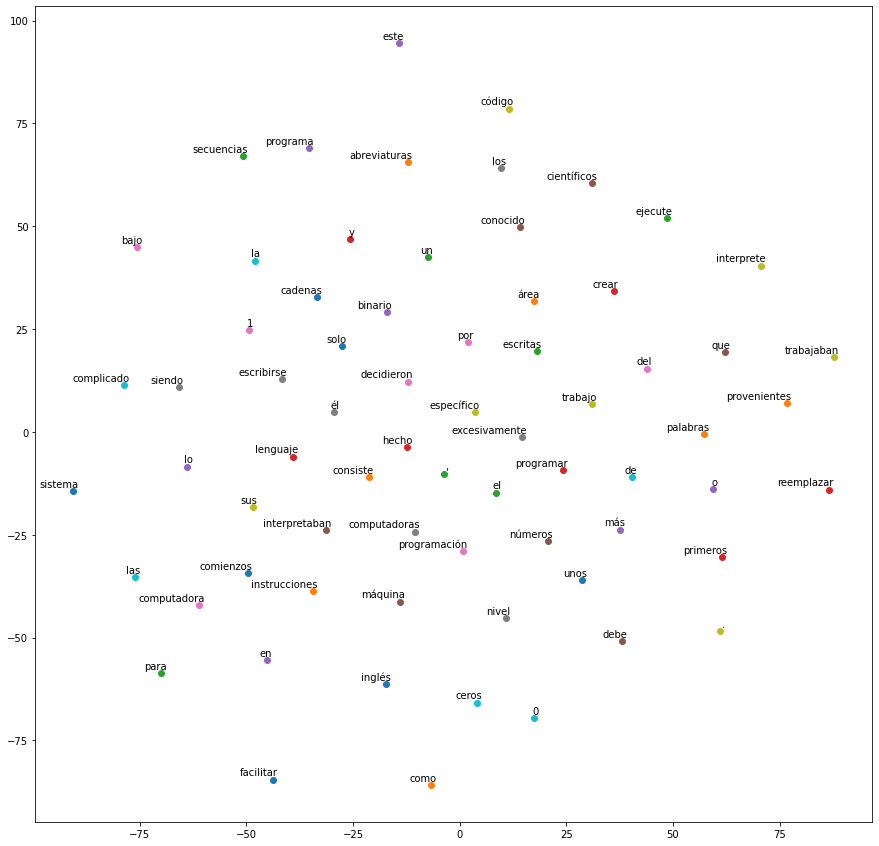

In [ ]:
x = []
y = []
for coordinate in vectors:
  x.append(coordinate[0])
  y.append(coordinate[1])


plt.figure(figsize=(15,15))
for i, word in enumerate(words_set):
  plt.scatter(x[i], y[i])
  plt.annotate(word,
               xy=(x[i], y[i]),
               xytext=(5, 2),
               textcoords='offset points',
               ha='right',
               va='bottom')
plt.show()